#### Autori: Domenico Lembo, Giuseppe Santucci and Marco Schaerf

[Dipartimento di Ingegneria informatica, automatica e gestionale](https://www.diag.uniroma1.it)

<img src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc-sa.eu.png"
     alt="License"
     style="float: left;"
     height="40" width="100" />
This notebook is distributed with license Creative Commons *CC BY-NC-SA*

# Trivia: indovina città e attrazione da immagini
1. Obiettivo del gioco
2. Preparazione del gioco
3. Creazione delle strutture dati
4. Esecuzione del gioco
5. Analisi dei dati

### Obiettivo del gioco
Dobbiamo implementare un semplice gioco a quiz su città e attrazioni. Il gioco consiste nel proporre all'utente una sequenza di immagini e chiedergli di riconoscere la città e l'attrazione a cui si riferiscono.

### Preparazione del gioco
Selezioniamo (almeno) 3 città ed (almeno) 3 attrazioni per ogni città. Assegnamo a ogni città e ad ogni attrazione un nome univoco per evitare ambiguità. Creiamo la directory del progetto e salviamo lì questo notebook. Troviamo sul web (almeno) 2 immagini per ogni attrazione. Per ogni immagine copiamo l'indirizzo dell'immagine. Ad esempio, in questa pagina Wikipedia sul [Colosseo](https://it.wikipedia.org/wiki/Colosseo) selezioniamo l'immagine in alto a destra e copiamo il suo indirizzo immagine, che dovrebbe essere https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Colosseum_in_Rome-April_2007-1-_copie_2B.jpg/390px-Colosseum_in_Rome-April_2007-1-_copie_2B.jpg. 

In Windows (Chrome o Firefox), premi il pulsante destro sull'immagine e quindi seleziona copia indirizzo immagine, in iOS (Safari) fai clic / tocca e tieni premuto sull'immagine e quindi selezionare copia. Creiamo un file CSV con una linea per ogni immagine (vedi formato sotto) e salviamo questo file come "images.csv" nella directory del progetto.

Il file CSV deve avere il seguente formato:

```
Città,attrazione,image_address
```

Dove image_address è l'indirizzo web del file dell'immagine. Non inserire spazi vuoti prima e dopo le virgole. **Non inserire** una riga di intestazione nel file.

### Creazione delle strutture dati
Leggiamo il file CSV e creiamo quattro strutture dati:
1. Una lista **lcitta** (ordinata alfabeticamente) delle città
2. Una lista **tutteImmagini** (ordinata alfabeticamente) degli indirizzi delle immagini.
3. Un dizionario **attrazioni** con chiave la città e valore la lista (ordinata alfabeticamente) delle attrazioni (senza ripetizioni).
4. Un dizionario **origini** con chiave l'indirizzo dell'immagine e valore la tupla (città,attrazione) corrispondente.

Per maggiore pulizia e riusabilità del codice scriviamo una funzione che prende in input il nome del file e restituisce le strutture dati discusse sopra nell'ordine in cui sono elencate.

In [2]:
from tester import tester_fun, tester_fun_comp

def creaStruttureDati(file):
    f=open(file,'r',encoding='UTF-8')
    lcittà=[]
    tutteImmagini=[]
    attrazioni={}
    origini={}
    for riga in f:
        pulita=riga.strip().split(',')
        if pulita[0] not in lcittà:
            lcittà.append(pulita[0])
        tutteImmagini.append(pulita[2])
        valore=attrazioni.get(pulita[0],[])
        valore.append(pulita[1])
        attrazioni[pulita[0]]=sorted(list(set(valore)))
        origini[pulita[2]]=(pulita[0],pulita[1])
    lcittà.sort()
    tutteImmagini.sort()
    f.close()
    
    return lcittà,tutteImmagini,attrazioni,origini

tester_fun(creaStruttureDati,['images1.csv'],(['Roma'], ['https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/Colosseum-exterior-2007.JPG/390px-Colosseum-exterior-2007.JPG', 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Colosseum_in_Rome-April_2007-1-_copie_2B.jpg/390px-Colosseum_in_Rome-April_2007-1-_copie_2B.jpg'], {'Roma': ['Colosseo']}, {'https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Colosseum_in_Rome-April_2007-1-_copie_2B.jpg/390px-Colosseum_in_Rome-April_2007-1-_copie_2B.jpg': ('Roma', 'Colosseo'), 'https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/Colosseum-exterior-2007.JPG/390px-Colosseum-exterior-2007.JPG': ('Roma', 'Colosseo')}) )
tester_fun(creaStruttureDati,['images2.csv'],(['Roma'], ['http://www.giovannirinaldi.it/page/rome/piazzadispagna/piazzadispagna0014.jpg', 'https://images.musement.com/cover/0002/23/thumb_122306_cover_header.jpeg', 'https://images.musement.com/default/0002/23/thumb_122314_default_header.jpeg', 'https://upload.wikimedia.org/wikipedia/commons/thumb/4/48/Piazza_di_Spagna.jpg/450px-Piazza_di_Spagna.jpg', 'https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/Colosseum-exterior-2007.JPG/390px-Colosseum-exterior-2007.JPG', 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Colosseum_in_Rome-April_2007-1-_copie_2B.jpg/390px-Colosseum_in_Rome-April_2007-1-_copie_2B.jpg'], {'Roma': ['Colosseo', 'Piazza Navona', 'Piazza di Spagna']}, {'https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Colosseum_in_Rome-April_2007-1-_copie_2B.jpg/390px-Colosseum_in_Rome-April_2007-1-_copie_2B.jpg': ('Roma', 'Colosseo'), 'https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/Colosseum-exterior-2007.JPG/390px-Colosseum-exterior-2007.JPG': ('Roma', 'Colosseo'), 'https://images.musement.com/cover/0002/23/thumb_122306_cover_header.jpeg': ('Roma', 'Piazza Navona'), 'https://images.musement.com/default/0002/23/thumb_122314_default_header.jpeg': ('Roma', 'Piazza Navona'), 'https://upload.wikimedia.org/wikipedia/commons/thumb/4/48/Piazza_di_Spagna.jpg/450px-Piazza_di_Spagna.jpg': ('Roma', 'Piazza di Spagna'), 'http://www.giovannirinaldi.it/page/rome/piazzadispagna/piazzadispagna0014.jpg': ('Roma', 'Piazza di Spagna')}) )
tester_fun(creaStruttureDati,['images3.csv'],(['Parigi'], ['https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Louvre_2007_02_24_c.jpg/330px-Louvre_2007_02_24_c.jpg', 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/85/Tour_Eiffel_Wikimedia_Commons_%28cropped%29.jpg/360px-Tour_Eiffel_Wikimedia_Commons_%28cropped%29.jpg', 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Sous_la_Tour_Eiffel_1.jpg/330px-Sous_la_Tour_Eiffel_1.jpg', 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Paris_July_2011-27a.jpg/1218px-Paris_July_2011-27a.jpg'], {'Parigi': ['Louvre', 'Torre Eiffel']}, {'https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Louvre_2007_02_24_c.jpg/330px-Louvre_2007_02_24_c.jpg': ('Parigi', 'Louvre'), 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Paris_July_2011-27a.jpg/1218px-Paris_July_2011-27a.jpg': ('Parigi', 'Louvre'), 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/85/Tour_Eiffel_Wikimedia_Commons_%28cropped%29.jpg/360px-Tour_Eiffel_Wikimedia_Commons_%28cropped%29.jpg': ('Parigi', 'Torre Eiffel'), 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Sous_la_Tour_Eiffel_1.jpg/330px-Sous_la_Tour_Eiffel_1.jpg': ('Parigi', 'Torre Eiffel')}) )

Test funzione: creaStruttureDati 

Input funzione: 'images1.csv' 

Output atteso:
 (['Roma'], ['https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/Colosseum-exterior-2007.JPG/390px-Colosseum-exterior-2007.JPG', 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Colosseum_in_Rome-April_2007-1-_copie_2B.jpg/390px-Colosseum_in_Rome-April_2007-1-_copie_2B.jpg'], {'Roma': ['Colosseo']}, {'https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Colosseum_in_Rome-April_2007-1-_copie_2B.jpg/390px-Colosseum_in_Rome-April_2007-1-_copie_2B.jpg': ('Roma', 'Colosseo'), 'https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/Colosseum-exterior-2007.JPG/390px-Colosseum-exterior-2007.JPG': ('Roma', 'Colosseo')}) 

----- print interne funzione -----

----------------------------------

Output ottenuto:
 (['Roma'], ['https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/Colosseum-exterior-2007.JPG/390px-Colosseum-exterior-2007.JPG', 'https://upload.wikimedia.org/wikipedia/commons

1

Eseguiamo la funzione sul file che avete creato e generiamo tutte le strutture dati

In [3]:
lcitta, tutteImmagini, attrazioni, origini = creaStruttureDati('images.csv')

### Esecuzione del gioco
Implementiamo il gioco nel seguente modo: chiediamo all'utente di inserire il suo nome (idealmente ogni esecuzione del gioco dovrebbe avere un utente diverso), quindi scegliamo in modo casuale 10 immagini dalla lista **tutteImmagini**. Mostriamo le immagini una alla volta all'utente e gli chiediamo di che città si tratti (l'utente può scegliere dall'elenco delle città possibili, cioè dalla lista **lcitta**).
Quindi gli chiediamo di indovinare l'attrazione (l'utente può scegliere dall'elenco delle possibili attrazioni per la città che ha selezionato). In entrambi i casi l'utente può anche selezionare la risposta "Non so". Se risponde "Non so" alla domanda sulla città assegniamo "Non so" anche all'attrazione e passiamo alla prossima immagine. 

Per non obbligare l'utente ad inserire il nome per esteso della città o dell'attrazione conviene numerare le varie opzioni e poi chiedere di inserire il numero corrispondente.

Salviamo tutti i risultati in un file CSV 'risposte.csv' con il seguente formato:

```
utente,cittàCorretta,attrazioneCorretta,indirizzoImmagine,cittàScelta,attrazioneScelta
```

Ogni esecuzione deve sempre aggiungere le nuove informazioni senza eliminare le risposte fornite dai giocatori precedenti.

Per selezionare 10 immagini a caso, possiamo usare la funzione di NumPy **np.random.choice(dati,num,replace=False)**, dove dati è l'array dei dati tra cui scegliere, num è il numero di elementi da selezionare e replace=False specifica che NON bisogna mai selezionare 2 volte lo stesso elemento. Questa funzione restituisce l'array dei num elementi scelti casualmente.

Per questa parte non è possibile definire dei tests, vi forniamo però uno scheletro della soluzione per aiutare nello sviluppo. 

In [4]:
#importiamo le librerie necessarie per il gioco
import numpy as np
from IPython.display import display, Image, clear_output

nonSo = "Non so" # Per poter poi cambiare questa frase, la salviamo in una variabile

utente = input('Inserisci il tuo nome per iniziare: ') #salva il nome dell'utente che sta effettuando il gioco

# Sceglie le 10 foto a caso
scelta = np.random.choice(tutteImmagini,10,replace=False)


# Apre il file per le risposte in modalità append
f = open('risposte.csv','a',encoding = 'UTF-8')
for foto in scelta:
    diz={}
    diz1={}
    image1 = Image(foto)
    display(image1)
    contatore=0
    cont=0
    for paese in lcitta:
        print(str(contatore)+')',paese)
        diz[str(contatore)]=paese
        contatore+=1
    print(str(contatore)+')',nonSo)
    risposta=input('scegli una delle risposte: ')
    if risposta=='3':
        print(utente,',',tupla[0],',',tupla[1],',',foto,',',nonSo,',',nonSo,sep='',file=f)
        continue
    possib=attrazioni.get(diz.get(risposta))
    for elem in possib:
        print(str(cont)+')',elem)
        diz1[str(cont)]=elem
        cont+=1
    print(str(cont)+')',nonSo)
    risposta1=input('scegli una delle risposte: ')
    tupla=origini.get(foto)
    print(utente,',',tupla[0],',',tupla[1],',',foto,',',diz.get(risposta),',',diz1.get(risposta1,nonSo),sep='',file=f)
    clear_output()
f.close()

### Analisi dei dati
Leggiamo il file 'risposte.csv' prodotto nel passaggio precedente e visualizziamo le seguenti informazioni:
1. Creiamo la [matrice di confusione](https://it.wikipedia.org/wiki/Matrice_di_confusione) delle città
2. Tracciamo con un istogramma il numero di risposte di città corrette per ogni esecuzione del gioco
3. Tracciamo con un istogramma il numero di risposte di città/attrazione corrette per ogni esecuzione del gioco
4. Tracciamo per ogni immagine la percentuale di risposte corrette di città e di città/attrazione

Vediamo queste operazioni una per una. Ogni operazione aprirà il file delle risposte e calcolerà i dati che gli servono, questa soluzione non è ovviamente molto efficiente, ma permette di separare meglio il codice ed i grafici.

#### Punto 1:
Creiamo la [matrice di confusione](https://it.wikipedia.org/wiki/Matrice_di_confusione) delle città. Questo vuol dire creare un array numpy **matConf** nx(n+1), dove n è il numero delle città, ed in ogni posizione (i,j) c'è il numero di volte in cui la risposta giusta era la città con indice i nella lista **lcitta** e l'utente ha risposto la città con indice j. Se l'utente ha risposto "Non so" inseriamo la risposta nella cella (i,n), cioè la colonna in più (quella di indice n, serve per contare le risposte "Non so" date ad immagini delle varie città). Definiamo una funzione che prende in ingresso il file delle risposte **file** e la lista delle città **lcitta** e restituisce la matrice di confusione.

In [5]:
from tester import tester_fun, tester_fun_comp

import numpy as np

def confusione(file,lcitta):
    f=open(file,'r',encoding='UTF-8')
    mat_conf=np.zeros((3,4),dtype=int)
    for riga in f:
        pulita=riga.strip().split(',')
        i=lcitta.index(pulita[1])
        if pulita[4]!=nonSo:
            n=lcitta.index(pulita[4])
            mat_conf[i][n]+=1
        else:
            mat_conf[i][3]+=1
    f.close()
    return mat_conf


tester_fun_comp(confusione,['risposte1.csv',lcitta],np.array([[2, 0, 1, 0],[2, 0, 0, 0],[0, 0, 3, 0]]),np.array_equal)
tester_fun_comp(confusione,['risposte2.csv',lcitta],np.array([[1, 0, 0, 2],[0, 0, 0, 2],[3, 0, 0, 2]]),np.array_equal)
tester_fun_comp(confusione,['risposte3.csv',lcitta],np.array([[2, 0, 0, 2],[7, 0, 0, 1],[5, 0, 2, 1]]),np.array_equal)

Test funzione: confusione 

Input funzione: 'risposte1.csv', ['New York', 'Parigi', 'Roma'] 

Output atteso:
 [[2 0 1 0]
 [2 0 0 0]
 [0 0 3 0]] 

----- print interne funzione -----

----------------------------------

Output ottenuto:
 [[1 0 0 0]
 [1 0 0 0]
 [0 0 2 0]] 

Risultato Test: NEGATIVO

******************************

Test funzione: confusione 

Input funzione: 'risposte2.csv', ['New York', 'Parigi', 'Roma'] 

Output atteso:
 [[1 0 0 2]
 [0 0 0 2]
 [3 0 0 2]] 

----- print interne funzione -----

----------------------------------

Output ottenuto:
 [[0 0 0 1]
 [0 0 0 1]
 [2 0 0 1]] 

Risultato Test: NEGATIVO

******************************

Test funzione: confusione 

Input funzione: 'risposte3.csv', ['New York', 'Parigi', 'Roma'] 

Output atteso:
 [[2 0 0 2]
 [7 0 0 1]
 [5 0 2 1]] 

----- print interne funzione -----

----------------------------------

Output ottenuto:
 [[2 0 0 2]
 [7 0 0 1]
 [5 0 2 1]] 

Risultato Test: POSITIVO

******************************



1

Possiamo ora creare e stampare la matrice di confusione sui vostri dati

In [29]:
matConf = confusione('risposte.csv',lcitta)
print('la matrice di confusione per le città:',lcitta,'è:')
print(matConf)

la matrice di confusione per le città: ['New York', 'Parigi', 'Roma'] è:
[[16  1  5  6]
 [ 7 15  1  4]
 [ 5  2 18  2]]


#### Punto 2:
Tracciamo con un istogramma il numero di risposte di città corrette per ogni esecuzione del gioco (in altri termini, per ogni valore *n* l'istogramma mostra in quante esecuzioni ci sono state *n* risposte corrette). Assumendo che **ad ogni esecuzione del gioco venga usato un nome diverso**, dobbiamo contare per ogni utente quante risposte esatte sulla città ha fornito e metterle in un array. Per fare questo calcolo definiamo una funzione *cittaCorrette* che prende in ingresso il file delle risposte e restituisce la lista (ordinata in ordine crescente) del numero delle risposte corrette relative alle città date da ciascun utente.

In [6]:
from tester import tester_fun, tester_fun_comp

def cittaCorrette(file):
    F=open(file,'r',encoding='UTF-8')
    dizio={}
    lista1=[]
    for riga in F:
        pul=riga.strip().split(',')
        if pul[1]==pul[4]:
            dizio[pul[0]]=dizio.get(pul[0],0)+1
        else:
            dizio[pul[0]]=dizio.get(pul[0],0)
    F.close()
    for key in dizio:
        lista1.append(dizio.get(key))
    return sorted(lista1)
        
    """Costruite e restituite la lista del numero di risposte
    corrette (sulla città) per ogni utente. La lista deve essere
    ordinata in ordine crescente
    """

tester_fun(cittaCorrette,['risposte1.csv'],[2,3])
tester_fun(cittaCorrette,['risposte2.csv'],[0,1])
tester_fun(cittaCorrette,['risposte3.csv'],[1,3])

Test funzione: cittaCorrette 

Input funzione: 'risposte1.csv' 

Output atteso:
 [2, 3] 

----- print interne funzione -----

----------------------------------

Output ottenuto:
 [3] 

Risultato Test: NEGATIVO

******************************

Test funzione: cittaCorrette 

Input funzione: 'risposte2.csv' 

Output atteso:
 [0, 1] 

----- print interne funzione -----

----------------------------------

Output ottenuto:
 [0] 

Risultato Test: NEGATIVO

******************************

Test funzione: cittaCorrette 

Input funzione: 'risposte3.csv' 

Output atteso:
 [1, 3] 

----- print interne funzione -----

----------------------------------

Output ottenuto:
 [4] 

Risultato Test: NEGATIVO

******************************



0

Usando la funzione sopra definita possiamo ora disegnare l'istogramma

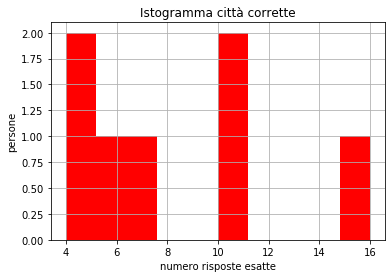

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

dati = cittaCorrette('risposte.csv')
x = np.array(dati)

plt.hist(x,color='r')

plt.xlabel('numero risposte esatte')
plt.ylabel('persone')
plt.title('Istogramma città corrette')
plt.grid(True)
plt.show()
# Disegna l'istogramma come specificato

#### Punto 3:
Tracciamo con un istogramma il numero di risposte di città e attrazione corrette per ogni esecuzione del gioco. Assumendo che **ad ogni esecuzione del gioco venga usato un nome diverso**, dobbiamo contare per ogni utente quante risposte esatte su città e attrazione ha fornito e metterle in un array, poi disegnare l'istogramma corrispondente. Come prima, definiamo una funzione *rispCorrette* che prende in ingresso il file delle risposte e restituisce la lista (ordinata in ordine crescente) del numero delle risposte corrette (città e attrazione) per ogni utente.

In [ ]:
from tester import tester_fun, tester_fun_comp

def rispCorrette(file):
    """Costruite e restituite la lista del numero di risposte
    corrette (sulla città e sull'attrazione) per ogni utente.
    La lista deve essere ordinata in ordine crescente
    """

tester_fun(rispCorrette,['risposte1.csv'],[1,2])
tester_fun(rispCorrette,['risposte2.csv'],[0,0])
tester_fun(rispCorrette,['risposte3.csv'],[0,2])

Usando la funzione sopra definita possiamo ora disegnare l'istogramma

In [ ]:
dati = rispCorrette('risposte.csv')
# Disegna l'istogramma come specificato

#### Punto 4:
Tracciamo per ogni immagine la percentuale di risposte corrette di città e di città/attrazione. Quindi dobbiamo fare un grafico con 2 plot, uno che mostra le risposte esatte sulla città dell'attrazione ed uno sul riconoscimento di città ed attrazione. L'asse x è quindi semplicemente l'indice delle immagini nella lista **tutteImmagini** e le 2 funzioni sono 2 array, della stessa dimensione della x, con il numero di risposte esatte nei 2 casi. Per prima cosa definiamo quindi una funzione che prende in ingresso il nome del file **file** con le risposte e la lista **lista** delle immagini e restituisce gli arrays x, y1 e y2.

In [ ]:
from tester import tester_fun, tester_fun_comp

def corretteImmagine(file,lista):
    """ Costruisci e restituisci i 3 arrays
    """

tester_fun_comp(corretteImmagine,['risposte1.csv',tutteImmagini],(np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]), np.array([0., 2., 1., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), np.array([0., 2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])),np.array_equal)
tester_fun_comp(corretteImmagine,['risposte2.csv',tutteImmagini],(np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]), np.array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])),np.array_equal)
tester_fun_comp(corretteImmagine,['risposte3.csv',tutteImmagini],(np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]), np.array([0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]), np.array([0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])),np.array_equal)

Usando la funzione appena definita possiamo ora disegnare le 2 funzioni

In [ ]:
#Calcoliamo le due funzioni sui vostri dati
x,y1,y2 = corretteImmagine('risposte.csv',tutteImmagini)
# Eseguite il plot delle 2 funzioni.
# Disegnate la y1 in blue tratteggiato (b--) e
# la y2 in rosso trattegggiato (r--)